In [4]:
import pandas_datareader as reader
import pandas as pd
import datetime as dt
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()
tickers = reader.get_data_yahoo(["^GSPC", "GC=F", "CL=F"], start, end)['Adj Close']
gdp = wb.download(indicator='NY.GDP.MKTP.CD', country='US', start=2000, end=2019)
gdp = gdp.reset_index(1).set_index('year')
gdp.index = pd.to_datetime(gdp.index, format="%Y")
data = gdp.join(tickers, how='outer')
data = data.interpolate(method='linear')
data = data.dropna()
data.columns = ["US GDP", "S&P 500", "Gold", "Oil"]
print(data)

                  US GDP      S&P 500         Gold        Oil
2000-08-30  1.047073e+13  1502.589966   273.899994  33.400002
2000-08-31  1.047204e+13  1517.680054   278.299988  33.099998
2000-09-01  1.047335e+13  1520.770020   277.000000  33.380001
2000-09-05  1.047466e+13  1507.079956   275.799988  33.799999
2000-09-06  1.047596e+13  1492.250000   274.200012  34.950001
...                  ...          ...          ...        ...
2022-11-18  2.137257e+13  3965.340088  1751.900024  80.080002
2022-11-21  2.137257e+13  3949.939941  1737.400024  79.730003
2022-11-22  2.137257e+13  4003.580078  1738.300049  80.949997
2022-11-23  2.137257e+13  4027.260010  1744.900024  77.940002
2022-11-25  2.137257e+13  4026.120117  1754.000000  76.279999

[5620 rows x 4 columns]


In [5]:
print(data.corr())

           US GDP   S&P 500      Gold       Oil
US GDP   1.000000  0.855617  0.860514  0.284951
S&P 500  0.855617  1.000000  0.693732  0.126501
Gold     0.860514  0.693732  1.000000  0.522809
Oil      0.284951  0.126501  0.522809  1.000000


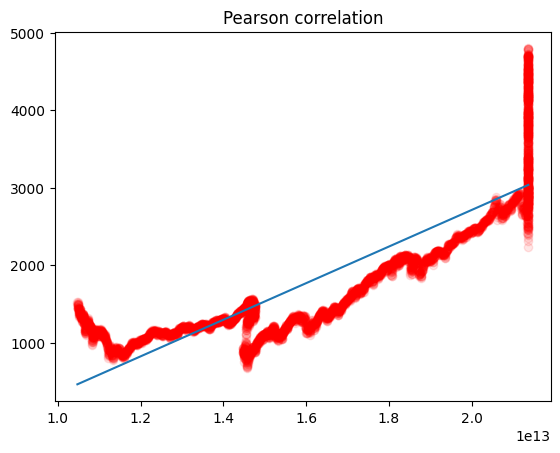

In [6]:
# Pearson fit (default method)
fit = np.polyfit(x=data['US GDP'], y=data['S&P 500'], deg=1)
line_fit = np.poly1d(fit)
plt.plot(data['US GDP'], line_fit(data['US GDP']))
plt.scatter(x=data['US GDP'], y=data['S&P 500'], color='red', alpha=0.1)
plt.title("Pearson correlation")
plt.show()

In [7]:
print(data.corr(method="kendall"))

           US GDP   S&P 500      Gold       Oil
US GDP   1.000000  0.743265  0.725757  0.255988
S&P 500  0.743265  1.000000  0.518503  0.162385
Gold     0.725757  0.518503  1.000000  0.394045
Oil      0.255988  0.162385  0.394045  1.000000


In [8]:
print(data.corr(method="spearman"))

           US GDP   S&P 500      Gold       Oil
US GDP   1.000000  0.884109  0.871030  0.330758
S&P 500  0.884109  1.000000  0.707551  0.233382
Gold     0.871030  0.707551  1.000000  0.541375
Oil      0.330758  0.233382  0.541375  1.000000
